In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('/home/ashioyajotham/HIV Testing/df.csv')
df.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,period,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data
0,FIDsgV3ezn0,Olasi Dispensary,13975.0,Kaler Ward,Nyatike Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,37.0,36.0,FIDsgV3ezn0,ETX9cUWF43c,32
1,KpXqE32Rm1d,Kombe Dispensary,13713.0,Masaba Ward,Kuria West Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,2020Q1,28.0,27.0,KpXqE32Rm1d,ETX9cUWF43c,27
2,V6P9Brv9LmO,Otati Dispensary,13999.0,Kanyasa Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q2,8.0,8.0,V6P9Brv9LmO,qSgLzXh46n9,8
3,QiXeOXMmlX0,Arombe Dispensary,13486.0,Wiga Ward,Suna West Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,18.0,18.0,QiXeOXMmlX0,qSgLzXh46n9,18
4,hLMDMOsAv6Y,Bande Dispensary,13494.0,Kaler Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,2020Q1,4.0,4.0,hLMDMOsAv6Y,qSgLzXh46n9,4


# Feature Enginneering

In [48]:
# We need to obtain date from the period column since it is in the format 2020Q1
# We will use the split function to split the period column into two columns
# The first column will be the year and the second column will be the quarter
# We will then use the concat function to concatenate the two columns into one column
# We will then use the to_datetime function to convert the column into a datetime object

df[['Year','Quarter']] = df['period'].str.split('Q',expand=True)
df.drop('period',axis=1,inplace=True)
df.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data,Year,Quarter
0,FIDsgV3ezn0,Olasi Dispensary,13975.0,Kaler Ward,Nyatike Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,37.0,36.0,FIDsgV3ezn0,ETX9cUWF43c,32,2020,1
1,KpXqE32Rm1d,Kombe Dispensary,13713.0,Masaba Ward,Kuria West Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,28.0,27.0,KpXqE32Rm1d,ETX9cUWF43c,27,2020,1
2,V6P9Brv9LmO,Otati Dispensary,13999.0,Kanyasa Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,8.0,8.0,V6P9Brv9LmO,qSgLzXh46n9,8,2020,2
3,QiXeOXMmlX0,Arombe Dispensary,13486.0,Wiga Ward,Suna West Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,18.0,18.0,QiXeOXMmlX0,qSgLzXh46n9,18,2020,1
4,hLMDMOsAv6Y,Bande Dispensary,13494.0,Kaler Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,4.0,4.0,hLMDMOsAv6Y,qSgLzXh46n9,4,2020,1


## Insights -
* `KSM` here means Kenya Standard Mean. It is the average number of people who test for HIV in a year. It is calculated by dividing the total number of people who test for HIV in a year by the number of years. 
* The KSM is used to compare the number of people who test for HIV in a year with the number of people who test for HIV in other years.


In [49]:
# We need to obtain the month from the quarter column
# We will use the replace function to replace the quarter with the corresponding month
# We will then use the concat function to concatenate the two columns into one column

df['Month'] = df['Quarter'].replace({'1':'01','2':'04','3':'07','4':'10'})
df.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data,Year,Quarter,Month
0,FIDsgV3ezn0,Olasi Dispensary,13975.0,Kaler Ward,Nyatike Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,37.0,36.0,FIDsgV3ezn0,ETX9cUWF43c,32,2020,1,01
1,KpXqE32Rm1d,Kombe Dispensary,13713.0,Masaba Ward,Kuria West Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,28.0,27.0,KpXqE32Rm1d,ETX9cUWF43c,27,2020,1,01
2,V6P9Brv9LmO,Otati Dispensary,13999.0,Kanyasa Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,8.0,8.0,V6P9Brv9LmO,qSgLzXh46n9,8,2020,2,04
3,QiXeOXMmlX0,Arombe Dispensary,13486.0,Wiga Ward,Suna West Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,18.0,18.0,QiXeOXMmlX0,qSgLzXh46n9,18,2020,1,01
4,hLMDMOsAv6Y,Bande Dispensary,13494.0,Kaler Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,4.0,4.0,hLMDMOsAv6Y,qSgLzXh46n9,4,2020,1,01


In [50]:
# We will now use the concat function to concatenate the year and month columns into one column
# We will then use the to_datetime function to convert the column into a datetime object

df['Date'] = pd.to_datetime(df['Year'] + df['Month'], format='%Y%m')
df.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data,Year,Quarter,Month,Date
0,FIDsgV3ezn0,Olasi Dispensary,13975.0,Kaler Ward,Nyatike Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,37.0,36.0,FIDsgV3ezn0,ETX9cUWF43c,32,2020,1,01,2020-01-01
1,KpXqE32Rm1d,Kombe Dispensary,13713.0,Masaba Ward,Kuria West Sub County,Migori County,ETX9cUWF43c,MOH 731 Initial test at ANC HV02-04,28.0,27.0,KpXqE32Rm1d,ETX9cUWF43c,27,2020,1,01,2020-01-01
2,V6P9Brv9LmO,Otati Dispensary,13999.0,Kanyasa Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,8.0,8.0,V6P9Brv9LmO,qSgLzXh46n9,8,2020,2,04,2020-04-01
3,QiXeOXMmlX0,Arombe Dispensary,13486.0,Wiga Ward,Suna West Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,18.0,18.0,QiXeOXMmlX0,qSgLzXh46n9,18,2020,1,01,2020-01-01
4,hLMDMOsAv6Y,Bande Dispensary,13494.0,Kaler Ward,Nyatike Sub County,Migori County,qSgLzXh46n9,MOH 731 Known Positive at 1st ANC HV02-03,4.0,4.0,hLMDMOsAv6Y,qSgLzXh46n9,4,2020,1,01,2020-01-01


In [51]:
# We will now use the set_index function to set the Date column as the index
# We will then use the drop function to drop the Year, Quarter and Month columns

#df.set_index('Date',inplace=True)
#df.drop(['Year','Quarter','Month'],axis=1,inplace=True)
#df.head()

# EDA

In [52]:
# Descriptive Statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   facilityuid        14 non-null     object        
 1   facility           14 non-null     object        
 2   code               14 non-null     float64       
 3   ward               14 non-null     object        
 4   sub_county         14 non-null     object        
 5   county             14 non-null     object        
 6   indicator          14 non-null     object        
 7   indicators         14 non-null     object        
 8   dhis2_value        14 non-null     float64       
 9   datim_value        14 non-null     float64       
 10  MOH_FacilityID     14 non-null     object        
 11  MOH_IndicatorCode  14 non-null     object        
 12  khis_data          14 non-null     int64         
 13  Year               14 non-null     object        
 14  Quarter     

In [53]:
df.select_dtypes(include=['int64','float64']).describe()

,code,dhis2_value,datim_value,khis_data
count,14.000000,14.000000,14.000000,14.000000
mean,15448.071429,15.142857,15.571429,14.571429
std,2853.800259,12.221401,12.023786,11.133555
min,13486.000000,1.000000,1.000000,1.000000
25%,13816.000000,5.000000,5.000000,5.000000
50%,13957.500000,12.500000,13.000000,13.000000
75%,15713.500000,22.750000,23.000000,20.000000
max,20568.000000,37.000000,36.000000,34.000000


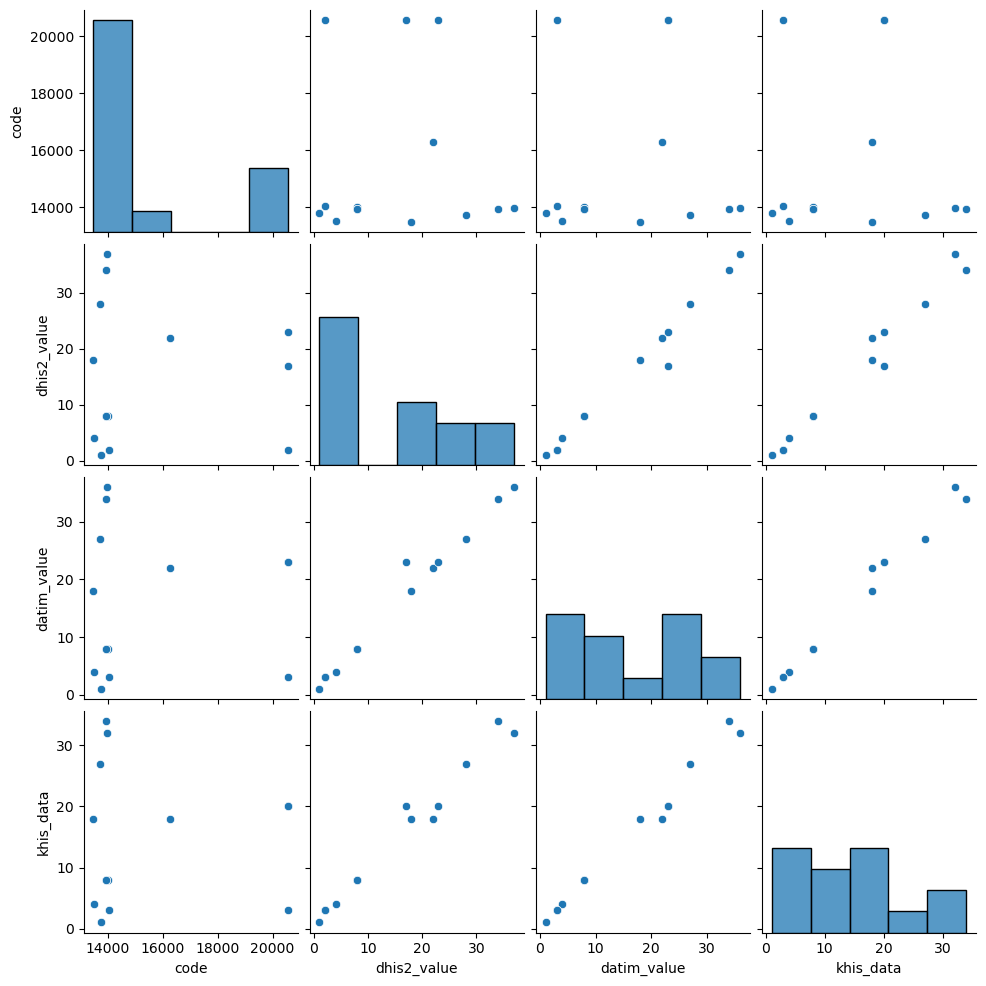

In [54]:
import seaborn as sns
sns.pairplot(df.select_dtypes(exclude=['object']))

In [55]:
# Correlation Matrix
df.select_dtypes(include=['int64','float64']).corr()

,code,dhis2_value,datim_value,khis_data
code,1.000000,-0.011096,0.073116,0.010905
dhis2_value,-0.011096,1.000000,0.990336,0.988116
datim_value,0.073116,0.990336,1.000000,0.992617
khis_data,0.010905,0.988116,0.992617,1.000000


<AxesSubplot:>

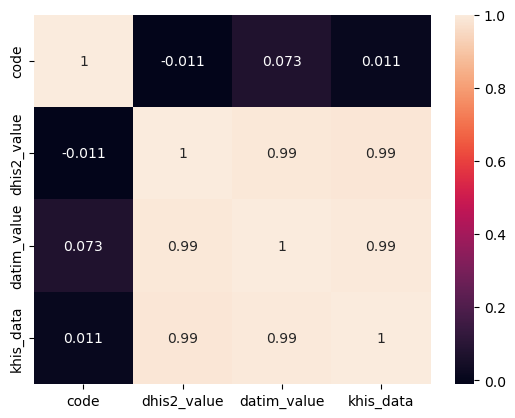

In [56]:
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(),annot=True)

## Visualizations

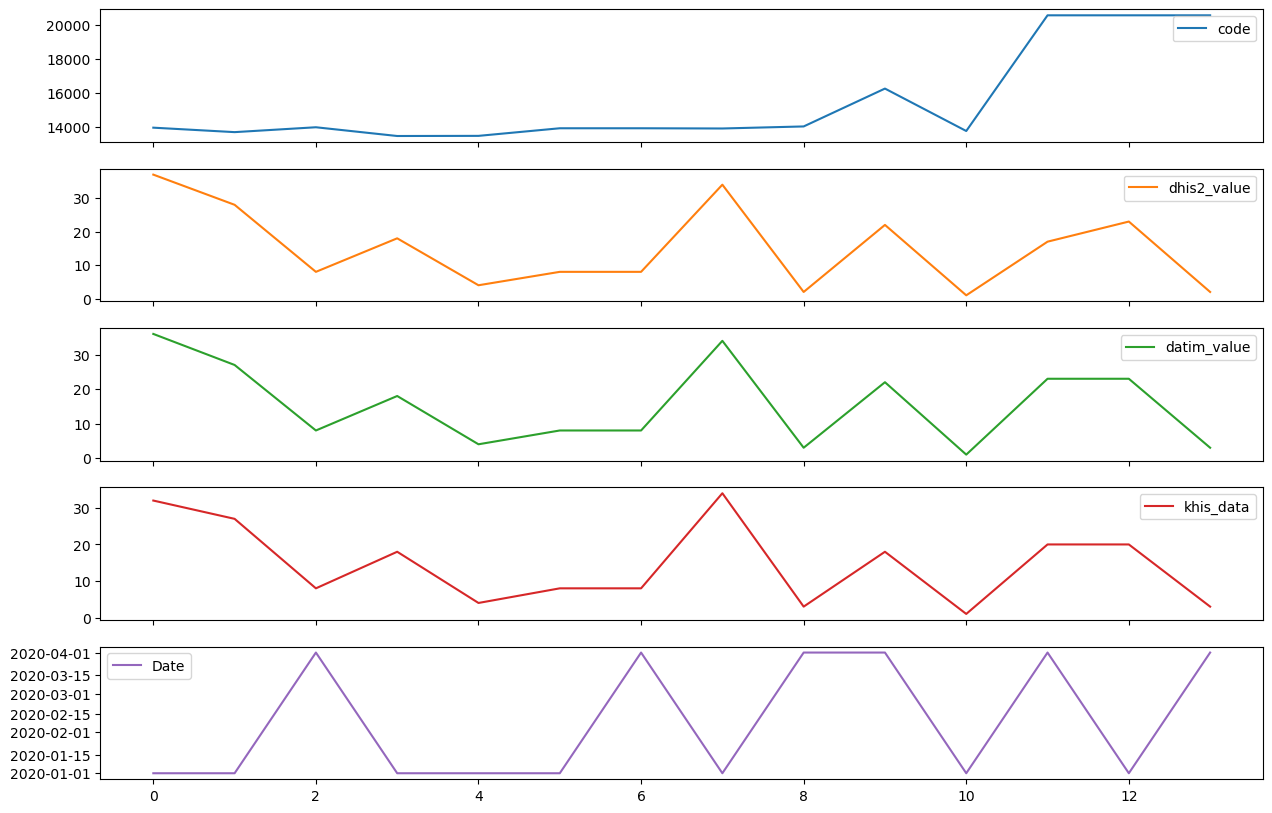

In [57]:
# Plot the data
df.plot(figsize=(15,10),subplots=True);

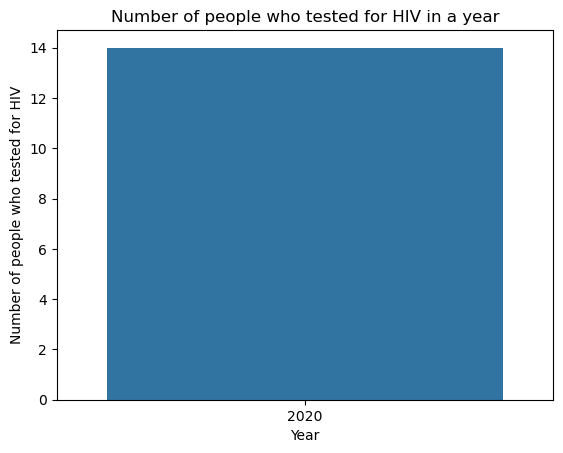

In [58]:
# Yearly HIV Testing
sns.countplot(x='Year',data=df)
plt.title('Number of people who tested for HIV in a year')
plt.xlabel('Year')
plt.ylabel('Number of people who tested for HIV')
plt.show();

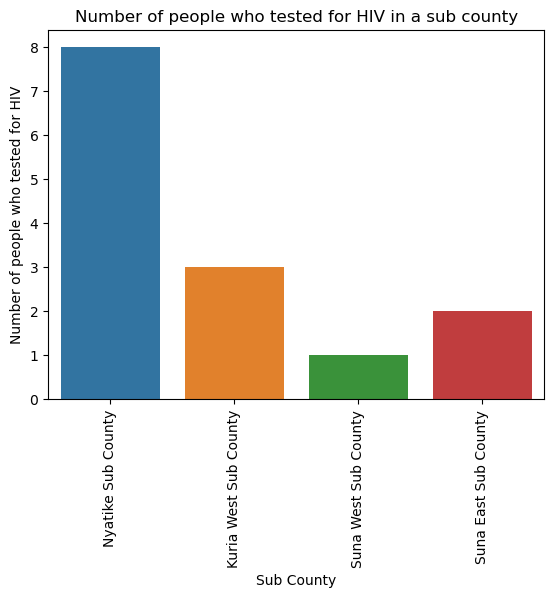

In [59]:
# Sub county wise HIV Testing
sns.countplot(x='sub_county',data=df)
plt.title('Number of people who tested for HIV in a sub county')
plt.xlabel('Sub County')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

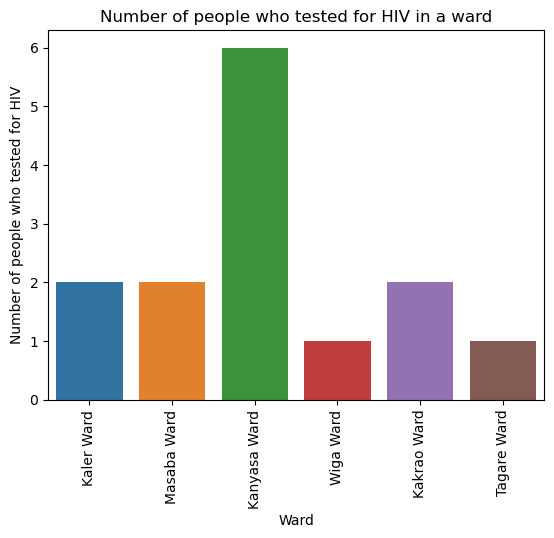

In [60]:
# Ward wise HIV Testing
sns.countplot(x='ward',data=df)
plt.title('Number of people who tested for HIV in a ward')
plt.xlabel('Ward')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

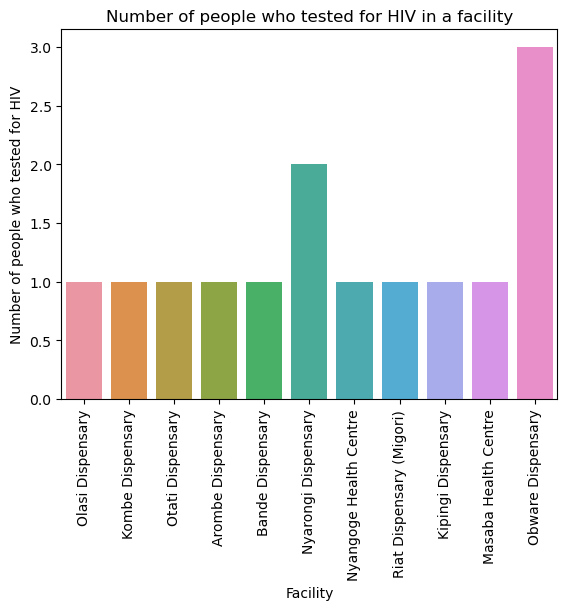

In [61]:
# Facility wise HIV Testing
sns.countplot(x='facility',data=df)
plt.title('Number of people who tested for HIV in a facility')
plt.xlabel('Facility')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

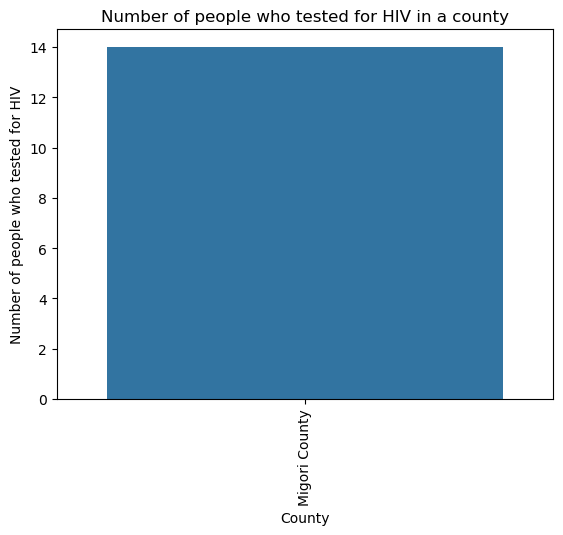

In [62]:
# County wise HIV Testing
sns.countplot(x='county',data=df)
plt.title('Number of people who tested for HIV in a county')
plt.xlabel('County')
plt.ylabel('Number of people who tested for HIV')
plt.xticks(rotation=90)
plt.show();

In [63]:
df2 = pd.read_csv('/home/ashioyajotham/HIV Testing/df2.csv')
df2.head()

,facilityuid,facility,code,ward,sub_county,county,indicator,indicators,period,dhis2_value,datim_value,MOH_FacilityID,MOH_IndicatorCode,khis_data
0,aCOEeeYEcsO,Rabondo Dispensary,14019.0,West sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,33.0,87.0,NaN,NaN,NaN
1,aCOEeeYEcsO,Rabondo Dispensary,14019.0,West sakwa Ward,Awendo Sub County,Migori County,OePJt8CcZ0d,MOH 731 Tested_1-9 HV01-01,2020Q1,14.0,13.0,NaN,NaN,NaN
2,aWpElDmioIw,Kuja Dispensary,13724.0,North sakwa Ward,Awendo Sub County,Migori County,JiuqbydCIcy,MOH 731 Tested_20-24(F) HV01-07,2019Q4,15.0,53.0,NaN,NaN,NaN
3,aWpElDmioIw,Kuja Dispensary,13724.0,North sakwa Ward,Awendo Sub County,Migori County,pkShOkgNQt2,MOH 731 Tested_20-24(M) HV01-06,2020Q2,9.0,10.0,NaN,NaN,NaN
4,aWpElDmioIw,Kuja Dispensary,13724.0,North sakwa Ward,Awendo Sub County,Migori County,YXJf27jfkvS,MOH 731 Tested_15-19(F) HV01-05,2019Q4,7.0,39.0,NaN,NaN,NaN


In [ ]:
# Obtain age group and gender from indicator column

df2["age_group"] = df2["indicator"].str.split(" ", n = 1, expand = True)[0]